In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 9.9
Code up a method to compute the barycentric weights for a given set of distinct points $\{x_0, \ldots, x_n\}$.

Using your weights method (and the barycentric construction), code up a method to evaluate the unique interpolating polynomial of $\{(x_0, y_0), \ldots, (x_n, y_n)\}$.

In [40]:
def bary_weights(x):
    '''Compute the barycentric weights given a sequence of distinct x values.

    Parameter:
        x (ndarray(dtype=float)): distinct x-values
    Return:
        weights (ndarray(dtype=float)): weights in the same order as x
    '''

    # Create a set of the points in x for easy iteration with set minus later
    x_set = set(x)

    # Check if there's a duplicate point in x
    if len(x) != len(x_set):
        raise ValueError('duplicate present in x')

    # Init list of weights
    weights = [None] * len(x)

    # Use formula to calculate each weight
    for i, x_j in enumerate(x):
        weights[i] = np.product(
            np.fromiter(
                ( 1/(x_j - x_k) for x_k in x_set - {x_j} ), 
                dtype=float
            )
        )

    return weights

def eval_poly(x, y, x0):
    '''Use bary_weights and the barycentric construction to evaluate the unique
    interpolating polynomial of points {(x_0, y_0), ..., (x_n, y_n)}.
    
    Parameters:
        x (ndarray(dtype=float)): distinct x-values
        y (ndarray(dtype=float)): y-values corresponding to x-values
        x0 (float or ndarray(dtype=float)): the point(s) at which to evaluate the interpolating polynomial
    Return:
        y0 (float or ndarray(dtype=float)): the evaluation of the interpolating polynomial at x0
    '''

    x = np.array(x)
    y = np.array(y)

    # Record whether given one x0 value to evaluate at (to determine return format)
    single_x0 = False

    # Turn x0 into an ndarray to keep later code consistent
    if isinstance(x0, (int, float)):
        x0 = np.array([x0], dtype=float)
        single_x0 = True
    elif len(x0) == 1:
        single_x0 = True
    
    # Create y0 in shape of x0 full of zeros as placeholder
    y0 = np.full_like(x0, 0)

    # The list of indices of x0 that must be computed rather than looked-up from y0
    indices_todo = list()

    # For each x_val in x0, check if x_val is in x, and update y0 with these already-known values
    for i, x_val in enumerate(x0):
        index = np.nonzero(x==x_val)[0]
        if len(index) != 0:
            y0[i] = y[index]
        else:
            indices_todo.append(i)
    
    # Get the remaining x0
    x0_todo = x0[indices_todo]

    # Compute weights
    weights = bary_weights(x)
    
    # Evaluate the polynomial interpolation at each remaining x-value in x0_todo
    for i, x0_todo_val in zip(indices_todo, x0_todo):
        summands = np.array(np.fromiter(
            (wj/(x0_todo_val-xj) for wj, xj in zip(weights, x)),
            dtype=float)
        )
        y0[i] = sum(y * summands)/sum(summands)
    
    # If originally given a single x-value, return a single y-value; otherwise, return an ndarray
    return y0 if not single_x0 else y0[0]

# 9.9
Using your method from the previous problem, for each of $n = 2,3, \ldots, 20$ compute and plot the interpolation polynomial for the function $f(x)=|x|$ at $n+1$ evenly spaced points on the interval $[-1,1]$ and graph $f$, for comparison, on the same plot.

Which of these interpolating polynomials has the smallest error (measured in terms of the $L^{\infty}$-norm) on the interval $[-1,1]$?

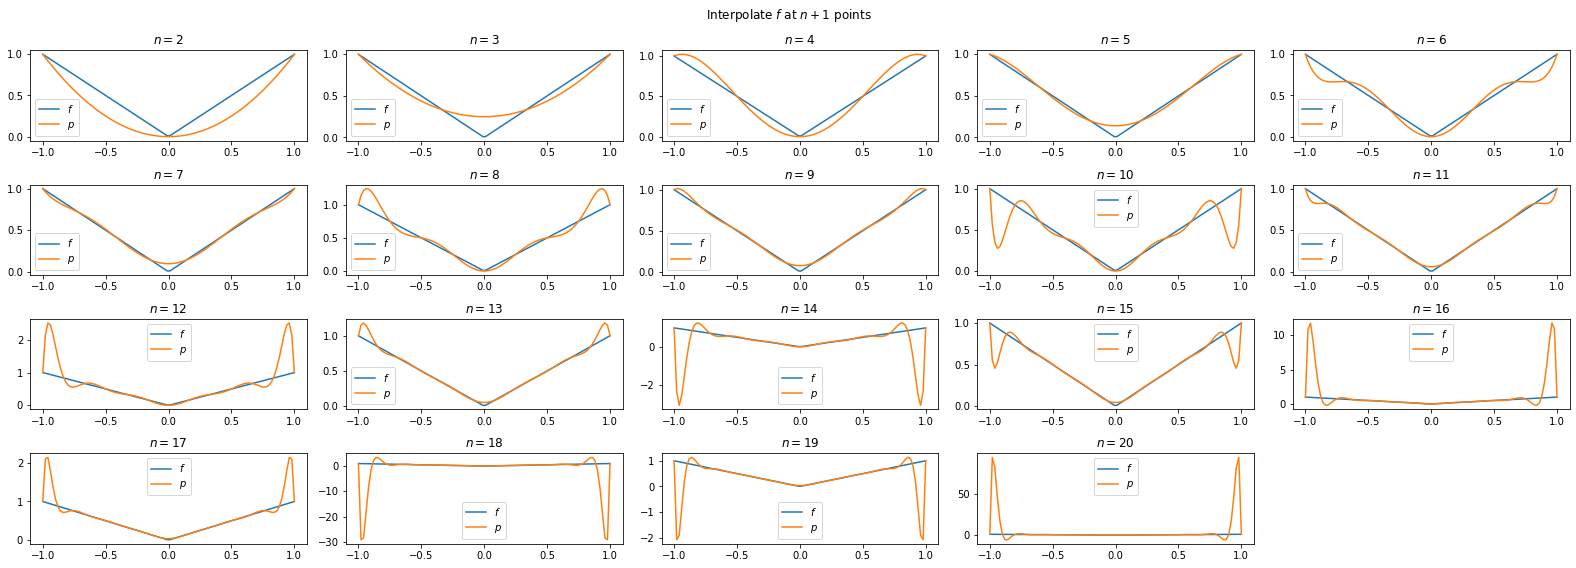

Value of n with smallest error: 9
Minimum error is approximately: 0.06497651011716195


In [24]:
# Function to interpolate
f = lambda x: np.abs(x)

# Number of points to use in drawing plot
NUM_PLOT_POINTS = 100

# Values of n for number of points to use in interpolating f
N = tuple(range(2, 20+1))

# Create fig and axs
fig, axs = plt.subplots(4, 5, figsize=(22,8))
axs = axs.flatten()

# Init error array
max_error = [-1] * len(N)

for i, (ax, n) in enumerate(zip(axs, N)):
    # x values and evaluate f at x
    x = np.linspace(-1,1,100)
    y = f(x)

    # Plot f
    ax.plot(x, y, label='$f$')

    # Points at which to interpolate f
    x_interp_pts = np.linspace(-1,1,n+1)
    y_interp_pts = f(x_interp_pts)

    # Evaluated values of interpolation for plotting
    y_interp_eval = eval_poly(x_interp_pts, y_interp_pts, x)

    # Approximate error in L^infty norm
    max_error[i] = max(np.abs(y_interp_eval - y))

    # Plot
    ax.plot(x, y_interp_eval, label='$p$')

    # Set title, show legend
    ax.set_xticks([-1, -0.5, 0, 0.5, 1])
    ax.set_title(f'$n={{{n}}}$')
    ax.legend()

# Delete last ax, set title, format, show
plt.delaxes(axs[-1])
plt.suptitle('Interpolate $f$ at $n+1$ points')
plt.tight_layout()
plt.show()

# Print error information
min_error_n = np.argmin(max_error) + 2
print(f'Value of n with smallest error: {min_error_n}')
print(f'Minimum error is approximately: {max_error[min_error_n-2]}')